## K-Means Clustering

Working with Mall-Customers dataset. 

Source - Kaggle

We would form clusters based on only two feartures: Annual Income and Spending Score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns={'Genre':'Gender'}, inplace=True)

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

All the data are numerical in nature.

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset.

In [9]:
## Since we would only work with Annual Income and Spending Score, we would drop all other features.
data.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True)

In [10]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## K-Means Clustering

Finding the optimal value of K using the Elbow Method

In [11]:
## Calculating the Within Cluster Sum of Squares(WCSS) for each k value

from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [12]:
wcss

[269981.2800000001,
 181363.5959595959,
 106348.37306211119,
 73679.78903948834,
 44448.45544793372,
 37442.24745037572,
 30241.34361793659,
 25063.652515864098,
 21841.978256748644,
 19653.38360624883]

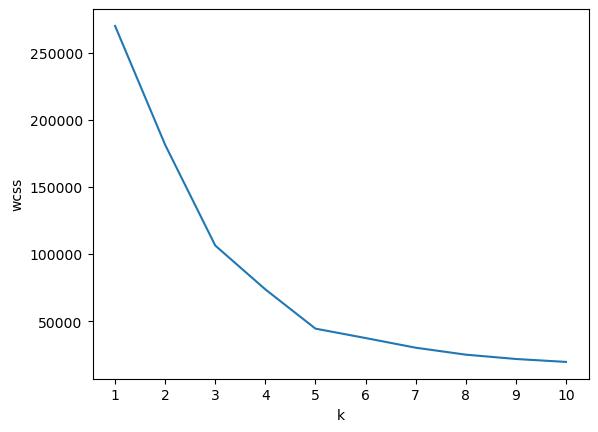

In [13]:
## Plotting the E;bow Curve 

plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

We find the elbow at k=5, i.e. the rate of fall in wcss decreases by a huge extent for k greater than 5. So the optimal value of k is 5. Now we would construct our model with 5 clusters of the mall customers. 

In [15]:
## Model building
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
Cluster = kmeans.labels_

In [17]:
Cluster

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [18]:
data['Cluster'] = pd.DataFrame(Cluster, columns=['Cluster'])

In [19]:
data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


The 'Cluster' column shows the cluster in which each of the customer in the dataset belongs.

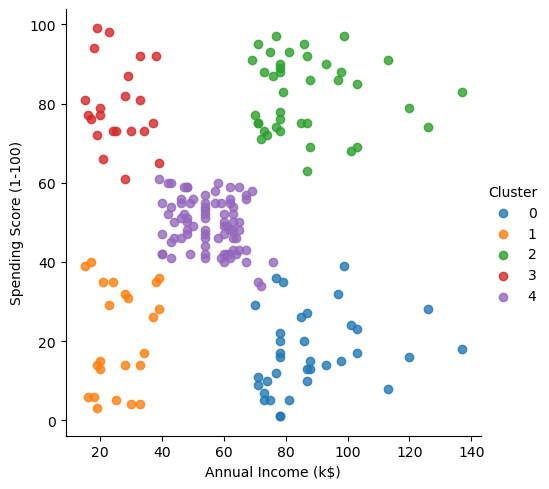

In [23]:
## PLotting the clusters
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, fit_reg=False, hue='Cluster')